In [95]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [133]:
import pandas as pd

FILE_ID = "20190828011349" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [134]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値(deg),ジャイロ推定角度(rad),ジャイロ推定角速度(rad/sec),モーター角度誤差(rad),モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターデューティー比左,モーターデューティー比右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーター印加電圧比左,モーター印加電圧比右
0,0,0.026865,0.000000,0.026791,0,0.0,0.000042,0.001745,0.000000,0.000000,0.000000,0.087438,0.096887,7682866,8.578305,7.741641,0.087438,0.096887
1,1,0.045069,0.018204,0.012856,0,-4.0,0.000084,0.001745,-0.069771,-2.034996,-0.001675,-10.406681,-11.532420,7594666,8.472650,7.645591,-10.406681,-11.532420
2,2,0.062494,0.017425,0.013689,-5,3.5,-0.001969,-0.085521,0.061170,3.819129,-0.000206,14.563973,16.139127,7612333,8.493814,7.664831,14.563973,16.139127
3,3,0.079120,0.016626,0.013022,-3,-4.5,-0.003183,-0.050612,-0.080509,-4.132300,-0.002139,-24.675256,-27.343254,7638066,8.524639,7.692854,-24.675256,-27.343254
4,4,0.094681,0.015561,0.012298,-32,4.0,-0.016546,-0.556756,0.066630,4.291534,-0.000540,-9.712198,-10.762706,7604000,8.483832,7.655756,-9.712198,-10.762706
5,5,0.111541,0.016860,0.013088,-20,1.0,-0.024881,-0.347299,0.000908,-1.916892,-0.000518,-40.111582,-44.447334,7666133,8.558261,7.723419,-40.111582,-44.447334
6,6,0.128125,0.016584,0.013010,-27,-3.0,-0.036148,-0.469461,-0.077241,-2.279327,-0.002372,-56.593249,-62.717017,7567266,8.439828,7.615753,-56.593249,-62.717017
7,7,0.144463,0.016338,0.012843,32,-9.5,-0.022701,0.560298,-0.201954,-3.637476,-0.007218,-21.933036,-24.308610,7480066,8.335371,7.520792,-21.933036,-24.308610
8,8,0.164501,0.020038,0.017030,55,-21.5,0.000380,0.961706,-0.397946,-5.716444,-0.016769,-2.328407,-2.579993,7702866,8.602263,7.763421,-2.328407,-2.579993
9,9,0.187425,0.022924,0.018661,-22,-30.5,-0.008793,-0.382228,-0.531945,-3.908295,-0.029536,-43.742082,-48.468012,7711533,8.612645,7.772859,-43.742082,-48.468012


In [135]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

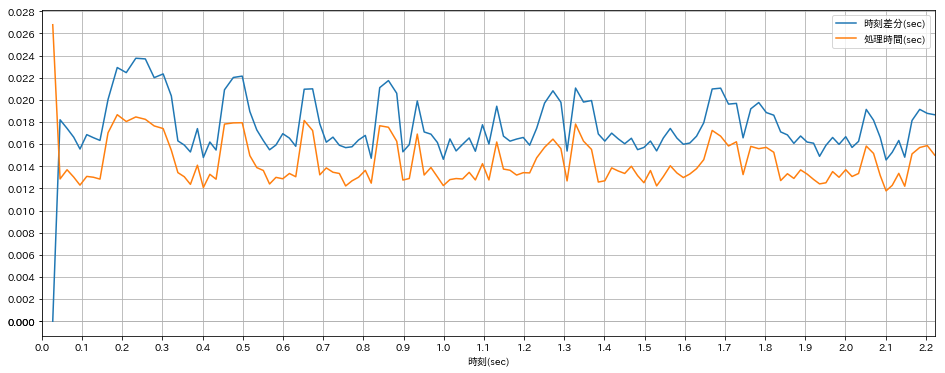

In [136]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

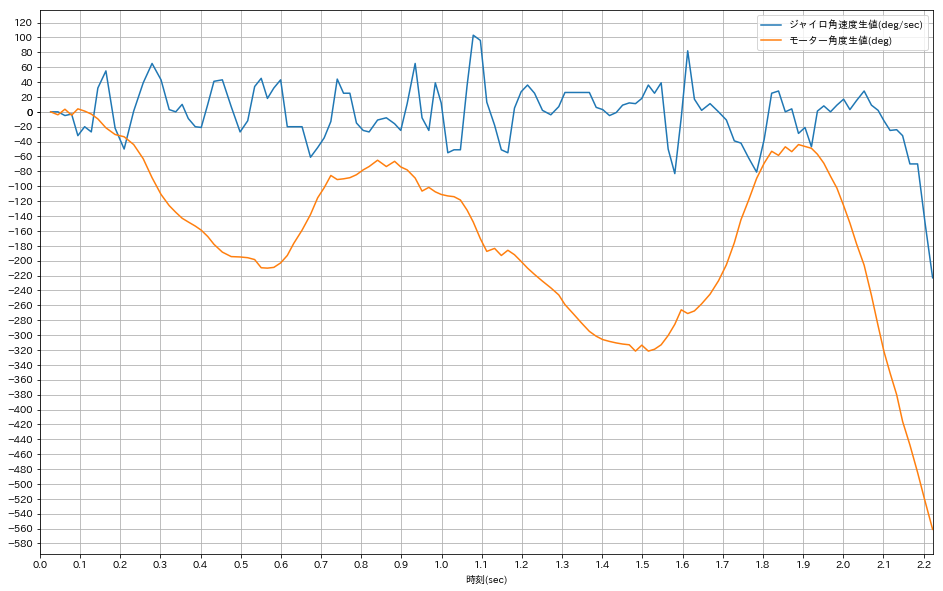

In [137]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)',
    'モーター角度生値(deg)',
]
show_plot(df, columns_deg, 20, figsize=(16,10))

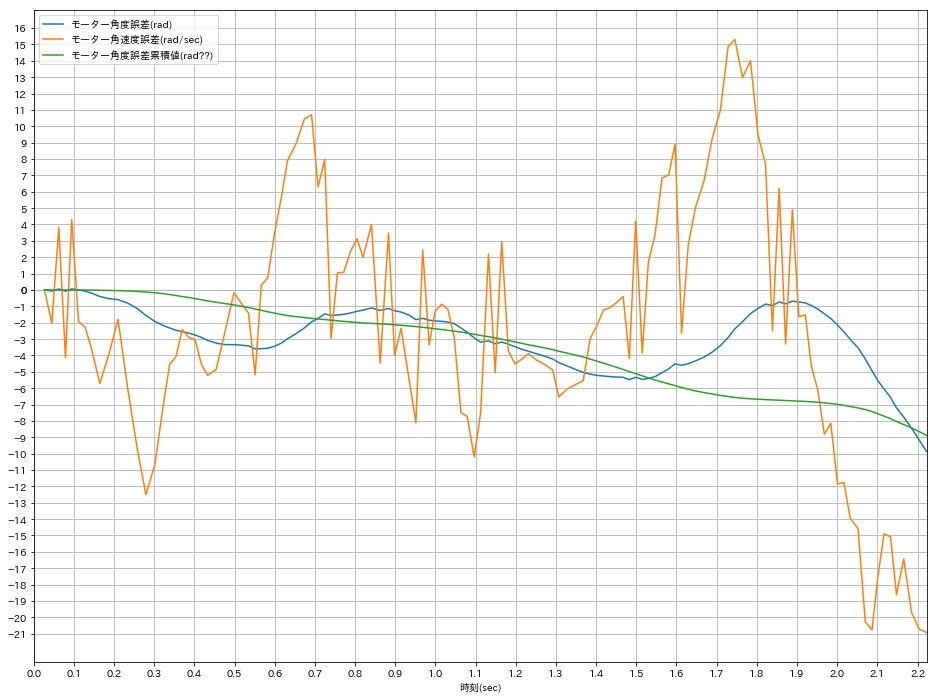

In [138]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)',
    'モーター角速度誤差(rad/sec)',
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

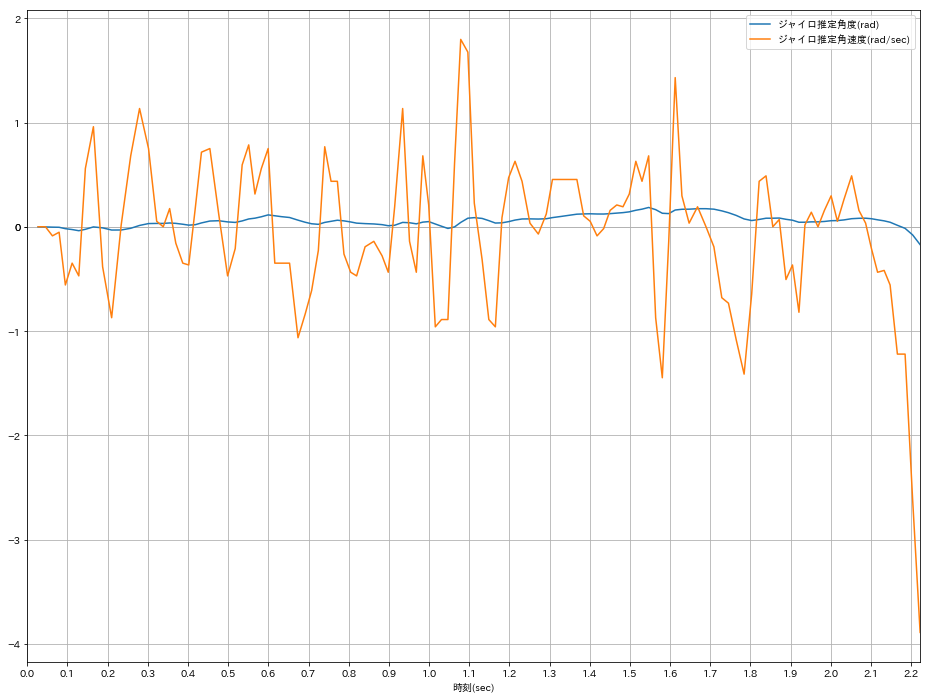

In [139]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)',
    'ジャイロ推定角速度(rad/sec)',
]
show_plot(df, columns_rad, 1, figsize=(16,12))

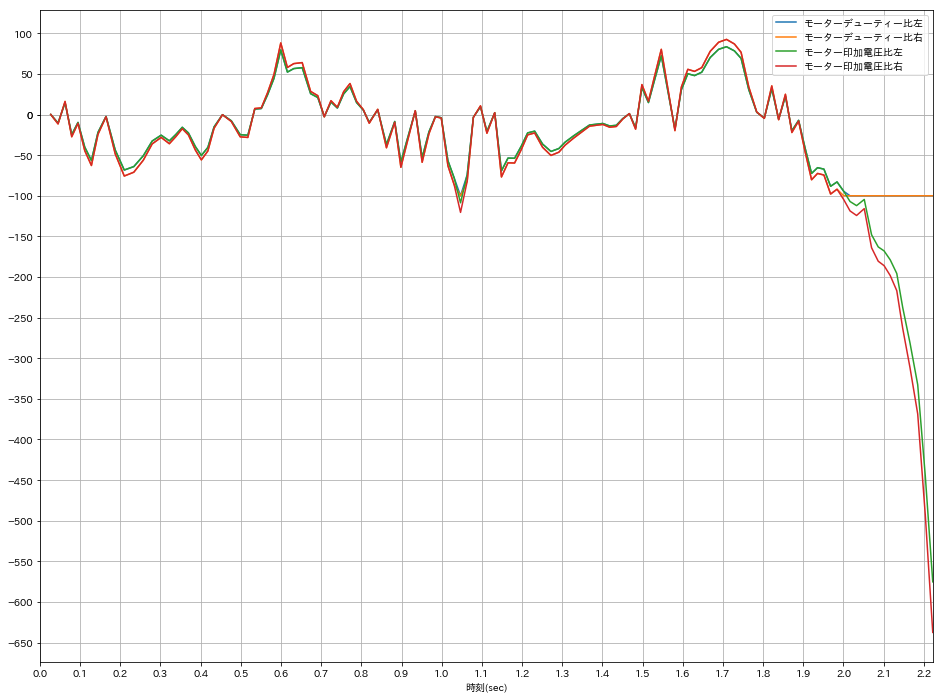

In [140]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターデューティー比左',
    'モーターデューティー比右',
    'モーター印加電圧比左',
    'モーター印加電圧比右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [141]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'